In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
flight_df = pd.read_csv('Flight_delay.csv')
flight_df = flight_df[['FlightNum', 'TailNum', 'Airline', 'Origin', 'Org_Airport', 'Dest', 'Dest_Airport','UniqueCarrier', 'DayOfWeek','Date', 'DepTime', 'ArrTime', 'CRSArrTime', 'CancellationCode',
                       'ActualElapsedTime', 'CRSElapsedTime', 'Distance', 'AirTime', 'ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

In [3]:
#Feature Engineering
flight_df['Date'] = pd.to_datetime(flight_df['Date'], dayfirst=True, errors='coerce')

#Extracting the year from the date column
flight_df['Year'] = pd.DatetimeIndex(flight_df['Date']).year

# Drop rows with invalid dates (optional, if you want to clean the data)
flight_df = flight_df.dropna(subset=['Date'])

# Extract Month and Day_of_Month
flight_df['Month'] = flight_df['Date'].dt.month
flight_df['Day_of_month'] = flight_df['Date'].dt.day

flight_df['DepDelay20'] = (flight_df['DepDelay'] >= 20).astype(int)
flight_df['ArrDelay20'] = (flight_df['ArrDelay'] >= 20).astype(int)
# Display the first few rows
print(flight_df.head())

   FlightNum TailNum                 Airline Origin  \
0       3920  N464WN  Southwest Airlines Co.    IND   
1        509  N763SW  Southwest Airlines Co.    IND   
2       1333  N334SW  Southwest Airlines Co.    IND   
3        675  N286WN  Southwest Airlines Co.    IND   
4          4  N674AA  Southwest Airlines Co.    IND   

                          Org_Airport Dest  \
0  Indianapolis International Airport  BWI   
1  Indianapolis International Airport  LAS   
2  Indianapolis International Airport  MCO   
3  Indianapolis International Airport  PHX   
4  Indianapolis International Airport  TPA   

                                 Dest_Airport UniqueCarrier  DayOfWeek  \
0  Baltimore-Washington International Airport            WN          4   
1              McCarran International Airport            WN          4   
2               Orlando International Airport            WN          4   
3    Phoenix Sky Harbor International Airport            WN          4   
4                 Tamp

In [4]:
#dropping the columns that are not needed
flight_data = flight_df.drop(columns=(['Cancelled', 'Diverted', 'CancellationCode']))
print(flight_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484551 entries, 0 to 484550
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   FlightNum          484551 non-null  int64         
 1   TailNum            484551 non-null  object        
 2   Airline            484551 non-null  object        
 3   Origin             484551 non-null  object        
 4   Org_Airport        483374 non-null  object        
 5   Dest               484551 non-null  object        
 6   Dest_Airport       483072 non-null  object        
 7   UniqueCarrier      484551 non-null  object        
 8   DayOfWeek          484551 non-null  int64         
 9   Date               484551 non-null  datetime64[ns]
 10  DepTime            484551 non-null  int64         
 11  ArrTime            484551 non-null  int64         
 12  CRSArrTime         484551 non-null  int64         
 13  ActualElapsedTime  484551 non-null  int64   

In [6]:
#checking for any null values in the data
print(flight_data.isnull().any())

FlightNum            False
TailNum              False
Airline              False
Origin               False
Org_Airport           True
Dest                 False
Dest_Airport          True
UniqueCarrier        False
DayOfWeek            False
Date                 False
DepTime              False
ArrTime              False
CRSArrTime           False
ActualElapsedTime    False
CRSElapsedTime       False
Distance             False
AirTime              False
ArrDelay             False
DepDelay             False
TaxiIn               False
TaxiOut              False
CarrierDelay         False
WeatherDelay         False
NASDelay             False
SecurityDelay        False
LateAircraftDelay    False
Year                 False
Month                False
Day_of_month         False
DepDelay20           False
ArrDelay20           False
dtype: bool


In [7]:
#dropping the rows with null values
flight_data.dropna(inplace=True)
print(flight_data.isnull().any())

FlightNum            False
TailNum              False
Airline              False
Origin               False
Org_Airport          False
Dest                 False
Dest_Airport         False
UniqueCarrier        False
DayOfWeek            False
Date                 False
DepTime              False
ArrTime              False
CRSArrTime           False
ActualElapsedTime    False
CRSElapsedTime       False
Distance             False
AirTime              False
ArrDelay             False
DepDelay             False
TaxiIn               False
TaxiOut              False
CarrierDelay         False
WeatherDelay         False
NASDelay             False
SecurityDelay        False
LateAircraftDelay    False
Year                 False
Month                False
Day_of_month         False
DepDelay20           False
ArrDelay20           False
dtype: bool


In [8]:
#Descriptive statistics of the data
print(flight_data.describe())

           FlightNum      DayOfWeek                           Date  \
count  481895.000000  481895.000000                         481895   
mean     2122.582467       3.991116  2019-03-27 11:04:43.901679360   
min         1.000000       1.000000            2019-01-01 00:00:00   
25%       626.000000       2.000000            2019-02-11 00:00:00   
50%      1505.000000       4.000000            2019-03-22 00:00:00   
75%      3659.000000       6.000000            2019-05-12 00:00:00   
max      8403.000000       7.000000            2019-06-30 00:00:00   
std      1802.895221       1.971202                            NaN   

             DepTime        ArrTime     CRSArrTime  ActualElapsedTime  \
count  481895.000000  481895.000000  481895.000000      481895.000000   
mean     1564.762019    1617.971840    1652.851901         135.165999   
min         1.000000       1.000000       1.000000          15.000000   
25%      1234.000000    1327.000000    1340.000000          80.000000   
50% 

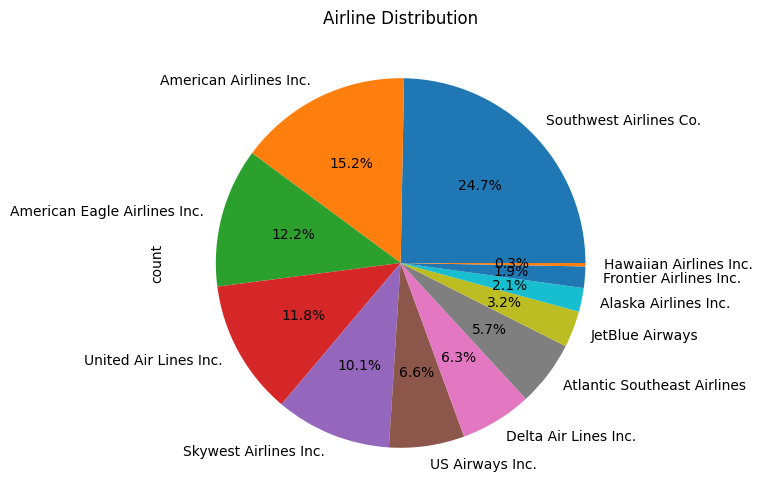

In [9]:
#Univariate Analysis
plt.figure(figsize=(6,6))
flight_data['Airline'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Airline Distribution')
plt.show()

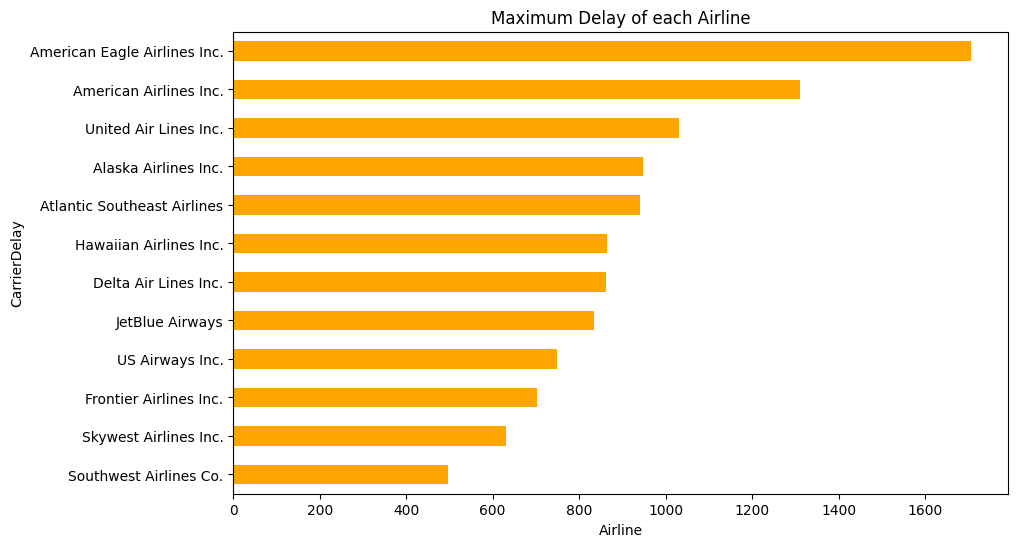

In [10]:
max_delay = flight_data.groupby('Airline')['CarrierDelay'].max().sort_values(ascending=True)
plt.figure(figsize=(10,6))
max_delay.plot.barh(color='orange', stacked=True)
plt.title('Maximum Delay of each Airline')
plt.xlabel('Airline')
plt.ylabel('CarrierDelay')
plt.show()

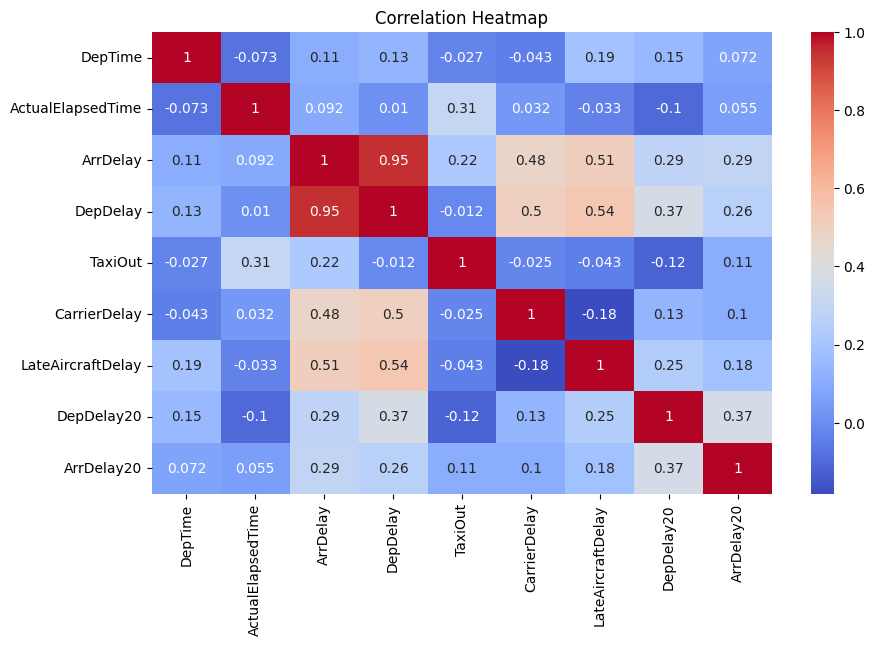

In [11]:
#Correlation Heatmap of the data to check the relationship between the variables
fig, axis = plt.subplots(figsize=(10,6))
corr = flight_data.iloc[:, 10:].corr()
top_corr_features = corr.index[abs(corr['DepDelay20']) > 0.1]
sns.heatmap(flight_data[top_corr_features].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
carrier_delay_df = flight_df[['FlightNum', 'Month', 'Day_of_month', 'DayOfWeek', 'Origin', 'Dest', 'DepDelay20', 'CRSArrTime', 'ArrDelay20']]
print(carrier_delay_df.head())

   FlightNum  Month  Day_of_month  DayOfWeek Origin Dest  DepDelay20  \
0       3920      1             3          4    IND  BWI           1   
1        509      1             3          4    IND  LAS           1   
2       1333      1             3          4    IND  MCO           1   
3        675      1             3          4    IND  PHX           1   
4          4      1             3          4    IND  TPA           1   

   CRSArrTime  ArrDelay20  
0        1925           1  
1        1940           1  
2        1725           1  
3        1625           0  
4        1510           0  


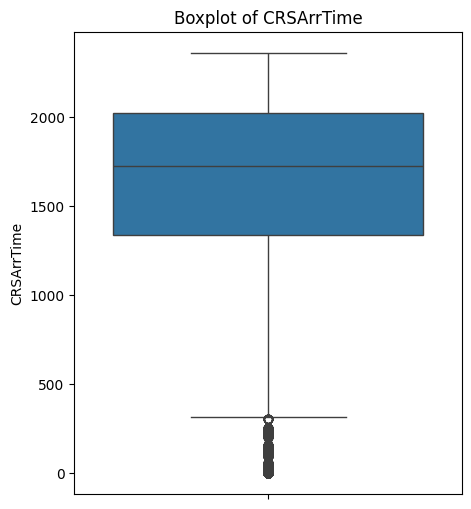

In [13]:
fig, ax = plt.subplots(figsize=(5, 6))
sns.boxplot(data=carrier_delay_df['CRSArrTime'], ax=ax)
plt.title('Boxplot of CRSArrTime')
plt.show()

In [14]:
# Calculate IQR
Q1 = carrier_delay_df['CRSArrTime'].quantile(0.25)  
Q3 = carrier_delay_df['CRSArrTime'].quantile(0.75)  
IQR = Q3 - Q1  

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

carrier_delay_df['CRSArrTime'] = carrier_delay_df['CRSArrTime'].clip(lower=lower_bound, upper=upper_bound)

C:\Users\sushe\AppData\Local\Temp\ipykernel_14360\4183316191.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carrier_delay_df['CRSArrTime'] = carrier_delay_df['CRSArrTime'].clip(lower=lower_bound, upper=upper_bound)


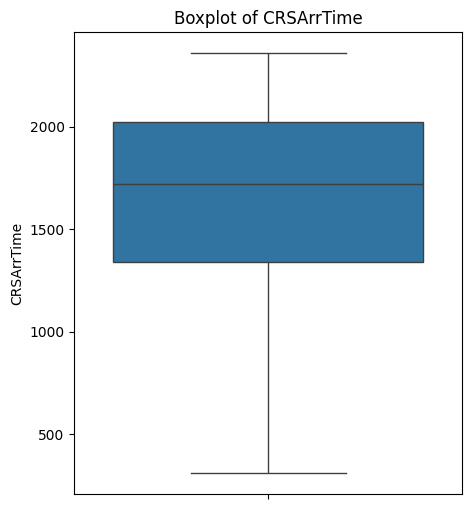

In [15]:
fig, ax = plt.subplots(figsize=(5, 6))
sns.boxplot(data=carrier_delay_df['CRSArrTime'], ax=ax)
plt.title('Boxplot of CRSArrTime')
plt.show()

In [16]:
#one-hot encoding the categorical variables
carrier_delay_df = pd.get_dummies(carrier_delay_df, columns=['Origin', 'Dest'])

In [18]:
X = carrier_delay_df.drop(columns=['DepDelay20', 'ArrDelay20'])
y = carrier_delay_df['DepDelay20']

In [19]:
X = X.values
y = y.values
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((387640, 553), (96911, 553), (387640,), (96911,))

In [23]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train.ravel())

c:\Users\sushe\Documents\BDA_Fall_2023\BDA_FALL_2024\CS_577\Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.ravel())

DecisionTreeClassifier()

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [27]:
y_train_pred_logistic = log_reg.predict(X_train)
y_train_pred_DecisionTree = clf.predict(X_train)
y_train_pred_KNN = knn.predict(X_train)
y_train_pred_RF = rf.predict(X_train)

In [28]:
Y_pred_logistic = log_reg.predict(X_test)
Y_pred_DecisionTree = clf.predict(X_test)
Y_pred_KNN = knn.predict(X_test)
Y_pred_RF = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accscore_train_log = accuracy_score(y_train, y_train_pred_logistic)
precision_log, recall_log, f1score_log, accscore_log = precision_score(y_test, Y_pred_logistic), recall_score(y_test, Y_pred_logistic), f1_score(y_test, Y_pred_logistic), accuracy_score(y_test, Y_pred_logistic)
print('Logistic Regression Model')
print('Precision: ', round(precision_log, 2))
print('Recall: ', round(recall_log,2))
print('F1 Score: ', round(f1score_log,2))
print('Training Accuracy: ', round(accscore_train_log,2))
print('Testing Accuracy: ', round(accscore_log,2))


Logistic Regression Model
Precision:  0.82
Recall:  1.0
F1 Score:  0.9
Training Accuracy:  0.82
Testing Accuracy:  0.72


In [ ]:
accscore_train_decision = accuracy_score(y_train, y_train_pred_DecisionTree)
precision_decision, recall_decision, f1score_decision, accscore_decision = precision_score(y_test, Y_pred_DecisionTree), recall_score(y_test, Y_pred_DecisionTree), f1_score(y_test, Y_pred_DecisionTree), accuracy_score(y_test, Y_pred_DecisionTree)
print('Decision Tree Model')
print('Precision: ', round(precision_decision, 2))
print('Recall: ', round(recall_decision, 2))
print('F1 Score: ', round(f1score_decision, 2))
print('Training Accuracy: ', round(accscore_train_decision, 2))
print('Testing Accuracy: ', round(accscore_decision, 2))

Decision Tree Model
Precision:  0.83
Recall:  0.82
F1 Score:  0.83
Training Accuracy:  0.82
Testing Accuracy:  0.6


In [ ]:
accscore_train_knn = accuracy_score(y_train, y_train_pred_KNN)
precision_knn, recall_knn, f1score_knn, accscore_knn = precision_score(y_test, Y_pred_KNN), recall_score(y_test, Y_pred_KNN), f1_score(y_test, Y_pred_KNN), accuracy_score(y_test, Y_pred_KNN)
print('KNN Model')
print('Precision: ', round(precision_knn, 2))
print('Recall: ', round(recall_knn, 2))
print('F1 Score: ', round(f1score_knn, 2))
print('Testing Accuracy: ', round(accscore_knn, 2))

KNN Model
Precision:  0.83
Recall:  0.94
F1 Score:  0.88
Testing Accuracy:  0.67


In [ ]:
accscore_train_rf = accuracy_score(y_train, y_train_pred_RF)
precision_rf, recall_rf, f1score_rf, accscore_rf = precision_score(y_test, Y_pred_RF), recall_score(y_test, Y_pred_RF), f1_score(y_test, Y_pred_RF), accuracy_score(y_test, Y_pred_RF)
print('Random Forest Model')
print('Precision: ', round(precision_rf, 2))
print('Recall: ', round(recall_rf, 2))
print('F1 Score: ', round(f1score_rf, 2))
print('Training Accuracy: ', round(accscore_train_rf, 2))
print('Testing Accuracy: ', round(accscore_rf, 2))

Random Forest Model
Precision:  0.83
Recall:  0.97
F1 Score:  0.89
Training Accuracy:  0.83
Testing Accuracy:  0.7


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

log_reg_tuned = LogisticRegression(
    C=0.1,                
    penalty='l2',         
    solver='liblinear',   
    max_iter=1000,         
    random_state=42       
)

log_reg_tuned.fit(X_train, y_train)
y_pred_tuned = log_reg_tuned.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Logistic Regression Accuracy: {accuracy:.4f}")

Tuned Logistic Regression Accuracy: 0.7700


In [17]:
#mean squared error of the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_tuned)
print('Mean Squared Error: ', mse)
#rsquared score of the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_tuned)
print('R2 Score: ', r2)

Mean Squared Error:  0.18153769953875204
R2 Score:  -0.22180337376131476


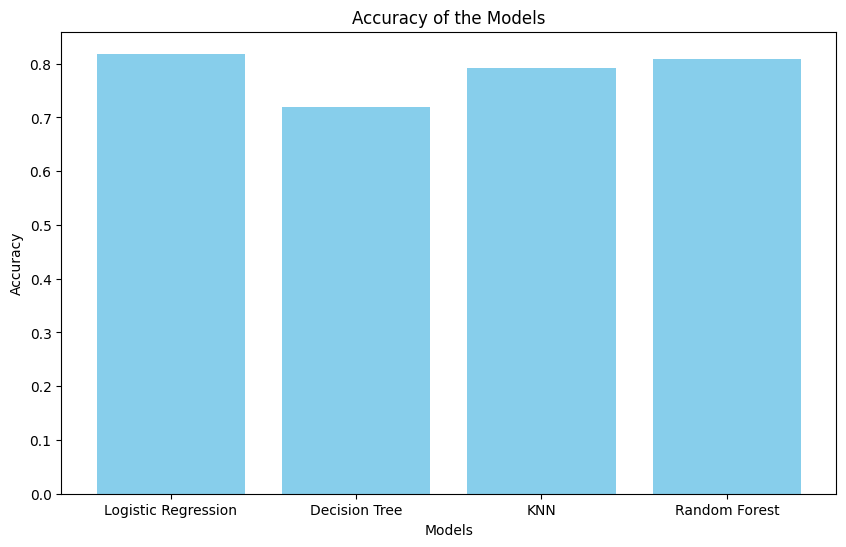

In [66]:
#plot the accuracy of the models
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest']
accuracy_list = [accscore_log, accscore_decision, accscore_knn, accscore_rf]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_list, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of the Models')
plt.show()

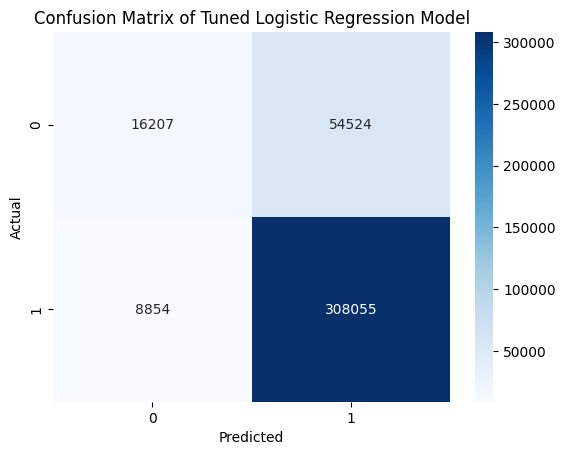

In [ ]:
#plot confusion matrix for the test data of the tuned logistic regression model
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_train, y_train_pred_logistic)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Tuned Logistic Regression Model')
plt.show()

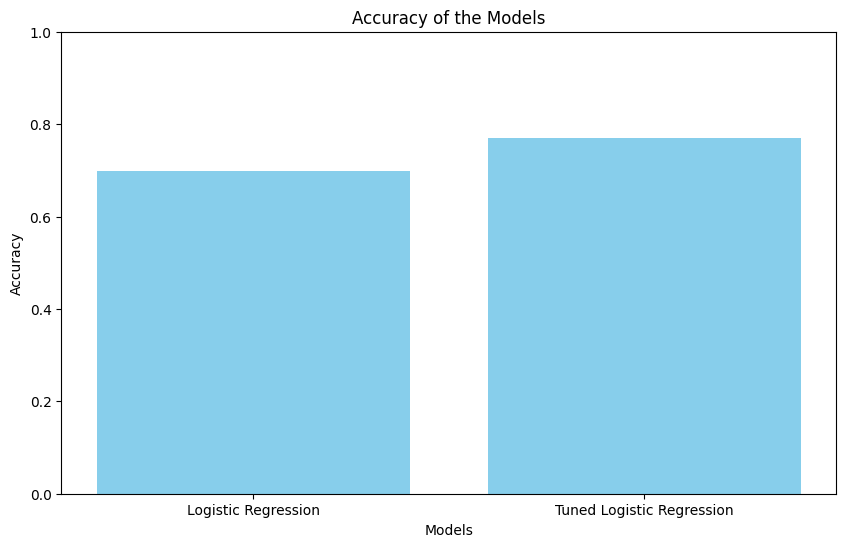

In [ ]:
models = ['Logistic Regression', 'Tuned Logistic Regression']
accuracies = [accscore_log, accuracy] 

# Plot the accuracy comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of the Models')
plt.ylim(0, 1)  
plt.show()